In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import numpy as np
import netCDF4 as nc
import xarray as xr
import metpy
import pandas as pd
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np

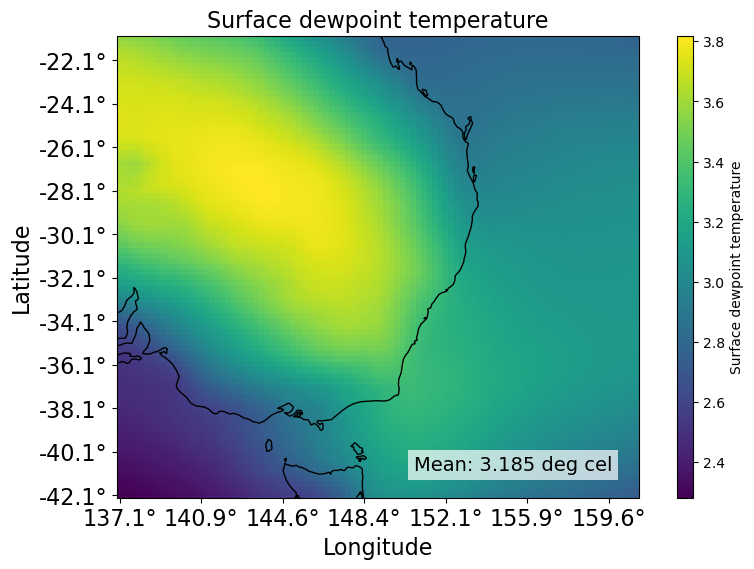

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

# Load your dataset (replace 'your_dataset.nc' with the actual file path)
ds = xr.open_dataset('/g/data/up6/gs5098/Project-2/delta/deltas_model/ensemble_delta/cropped_warmmonthly_avg_dps.nc')

# Extract the 'tos' variable (if already loaded as a DataArray, you can skip this step)
hurs = ds['dps']

# Calculate domain mean value
domain_mean = np.nanmean(hurs.values)

# Plotting the data
plt.figure(figsize=(10, 6))

# Set up a map projection
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN, edgecolor='black')

# Define intervals for lat and lon
lon_ticks = hurs.lon.values[::15]  # Every 2nd longitude value
lat_ticks = hurs.lat.values[::8]  # Every 2nd latitude value

# Set lat and lon as xticks and yticks with intervals
ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

# Optionally, format tick labels for better readability
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.1f}°"))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.1f}°"))


# Add labels for lat and lon
ticks_formatter = ax.xaxis.get_major_formatter()
ax.xaxis.set_major_formatter(ticks_formatter)
ax.yaxis.set_major_formatter(ticks_formatter)

# Plot the data using pcolormesh
mesh = plt.pcolormesh(hurs.lon, hurs.lat, hurs, transform=ccrs.PlateCarree(), cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(mesh, orientation='vertical', pad=0.05, aspect=30)
cbar.set_label('Surface dewpoint temperature')

# Add title and labels
plt.title('Surface dewpoint temperature', fontsize=16)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)

# Annotate domain mean value in the bottom right
ax.text(
    0.95, 0.05, f'Mean: {domain_mean:.3f} deg cel', 
    transform=ax.transAxes,
    fontsize=14,
    verticalalignment='bottom',
    horizontalalignment='right',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
)

# Show the plot
plt.show()

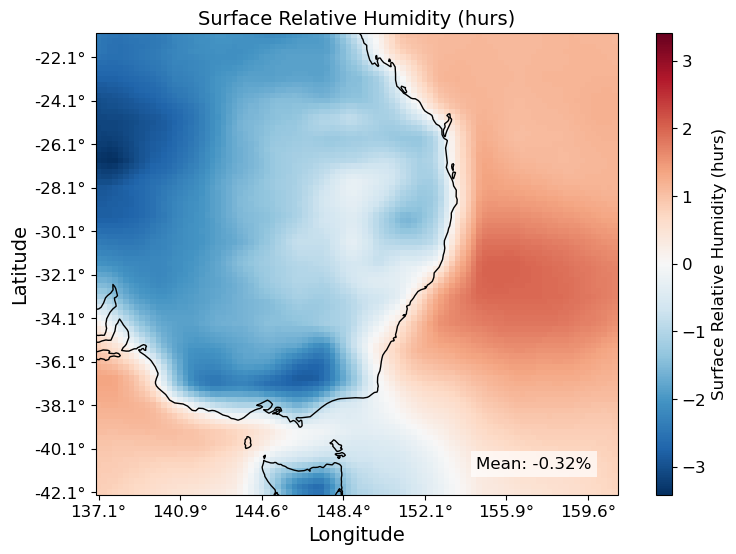

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np

# Load dataset
ds = xr.open_dataset('/g/data/up6/gs5098/Project-2/delta/deltas_model/ensemble_delta/cropped_warmmonthly_avg_hurs.nc')

# Extract the 'hurs' variable
hurs = ds['hurs']

# Calculate domain mean value
domain_mean = np.nanmean(hurs.values)

# Set diverging colormap and ensure zero is at the center
cmap = plt.cm.RdBu_r  # RdBu reversed for more intuitive visualization
vmax = np.nanmax(np.abs(hurs.values))  # Max absolute value to ensure symmetric scaling
vmin = -vmax

# Plotting
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN, edgecolor='black')

# Define intervals for lat and lon
lon_ticks = hurs.lon.values[::15]
lat_ticks = hurs.lat.values[::8]

# Set lat/lon ticks
ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

# Format tick labels
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.1f}°"))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.1f}°"))

# Plot data with diverging colormap and centered color limits
mesh = plt.pcolormesh(
    hurs.lon, hurs.lat, hurs, transform=ccrs.PlateCarree(),
    cmap=cmap, vmin=vmin, vmax=vmax
)

# Add colorbar
cbar = plt.colorbar(mesh, orientation='vertical', pad=0.05, aspect=30)
cbar.set_label('Surface Relative Humidity (hurs)', fontsize=12)
cbar.ax.tick_params(labelsize=12)

# Title and labels
plt.title('Surface Relative Humidity (hurs)', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate domain mean value in the bottom right
ax.text(
    0.95, 0.05, f'Mean: {domain_mean:.2f}%', 
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='bottom',
    horizontalalignment='right',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
)

plt.show()


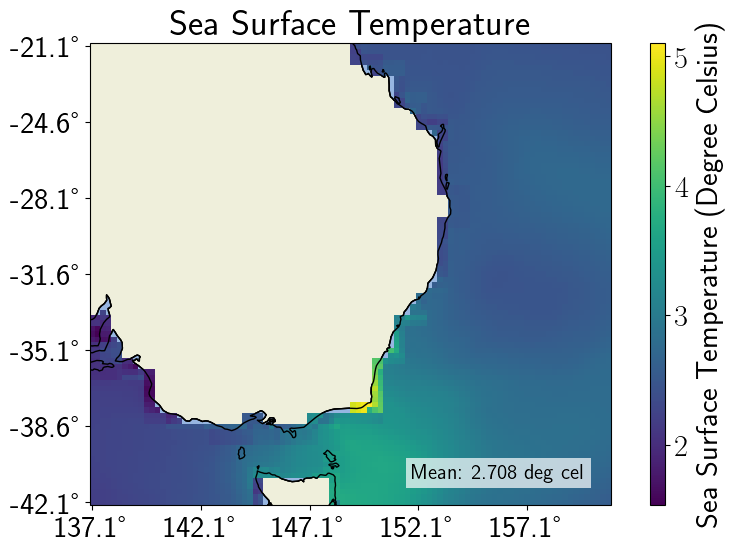

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

plt.rcParams.update({"text.usetex": True, "font.size": 22})

# Load your dataset (replace 'your_dataset.nc' with the actual file path)
ds = xr.open_dataset('/g/data/up6/gs5098/Project-2/delta/deltas_model/ensemble_delta/cropped_warmmonthly_avg_tos.nc')

# Extract the 'tos' variable (if already loaded as a DataArray, you can skip this step)
hurs = ds['tos']

# Calculate domain mean value
domain_mean = np.nanmean(hurs.values)

# Plotting the data
plt.figure(figsize=(10, 6))

# Set up a map projection
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN, edgecolor='black')

# Define intervals for lat and lon
lon_ticks = hurs.lon.values[::20]  # Every 2nd longitude value
lat_ticks = hurs.lat.values[::14]  # Every 2nd latitude value

# Set lat and lon as xticks and yticks with intervals
ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

# Optionally, format tick labels for better readability
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.1f}°"))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.1f}°"))


# Add labels for lat and lon
ticks_formatter = ax.xaxis.get_major_formatter()
ax.xaxis.set_major_formatter(ticks_formatter)
ax.yaxis.set_major_formatter(ticks_formatter)

# Plot the data using pcolormesh
mesh = plt.pcolormesh(hurs.lon, hurs.lat, hurs, transform=ccrs.PlateCarree(), cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(mesh, orientation='vertical', pad=0.05, aspect=30)
cbar.set_label('Sea Surface Temperature (Degree Celsius)')

# Add title and labels
plt.title('Sea Surface Temperature')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
plt.xticks( )
plt.yticks()

# Annotate domain mean value in the bottom right
ax.text(
    0.95, 0.05, f'Mean: {domain_mean:.3f} deg cel', 
    transform=ax.transAxes,
    fontsize=15,
    verticalalignment='bottom',
    horizontalalignment='right',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
)

# Show the plot
plt.show()

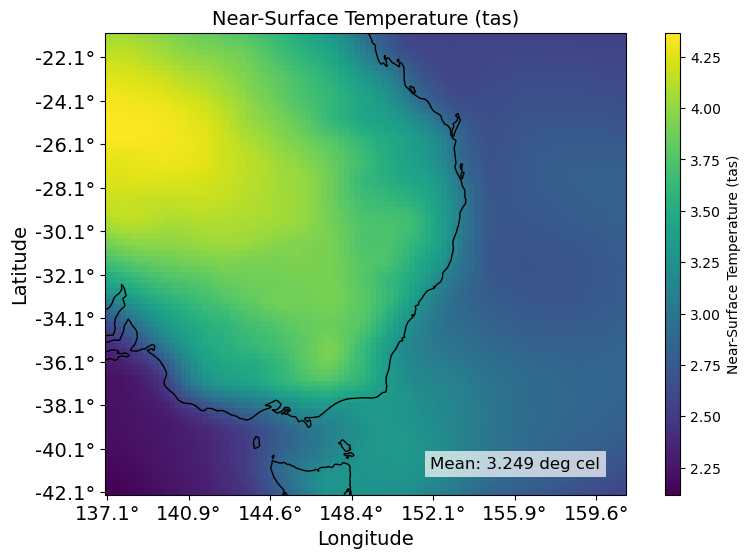

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

# Load your dataset (replace 'your_dataset.nc' with the actual file path)
ds = xr.open_dataset('/g/data/up6/gs5098/Project-2/deltas_model/ensemble_delta/cropped_warmmonthly_avg_tas.nc')

# Extract the 'tos' variable (if already loaded as a DataArray, you can skip this step)
hurs = ds['tas']

# Calculate domain mean value
domain_mean = np.nanmean(hurs.values)

# Plotting the data
plt.figure(figsize=(10, 6))

# Set up a map projection
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN, edgecolor='black')

# Define intervals for lat and lon
lon_ticks = hurs.lon.values[::15]  # Every 2nd longitude value
lat_ticks = hurs.lat.values[::8]  # Every 2nd latitude value

# Set lat and lon as xticks and yticks with intervals
ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

# Optionally, format tick labels for better readability
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.1f}°"))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.1f}°"))


# Add labels for lat and lon
ticks_formatter = ax.xaxis.get_major_formatter()
ax.xaxis.set_major_formatter(ticks_formatter)
ax.yaxis.set_major_formatter(ticks_formatter)

# Plot the data using pcolormesh
mesh = plt.pcolormesh(hurs.lon, hurs.lat, hurs, transform=ccrs.PlateCarree(), cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(mesh, orientation='vertical', pad=0.05, aspect=30)
cbar.set_label('Near-Surface Temperature (tas)')

# Add title and labels
plt.title('Near-Surface Temperature (tas)', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.xticks( fontsize=14)
plt.yticks( fontsize=14)

# Annotate domain mean value in the bottom right
ax.text(
    0.95, 0.05, f'Mean: {domain_mean:.3f} deg cel', 
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='bottom',
    horizontalalignment='right',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
)

# Show the plot
plt.show()

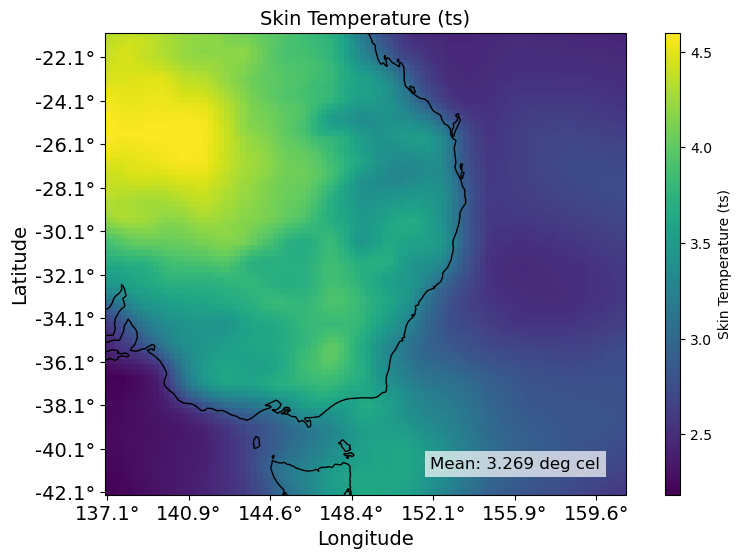

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

# Load your dataset (replace 'your_dataset.nc' with the actual file path)
ds = xr.open_dataset('/g/data/up6/gs5098/Project-2/deltas_model/ensemble_delta/cropped_warmmonthly_avg_ts.nc')

# Extract the 'tos' variable (if already loaded as a DataArray, you can skip this step)
hurs = ds['ts']

# Calculate domain mean value
domain_mean = np.nanmean(hurs.values)

# Plotting the data
plt.figure(figsize=(10, 6))

# Set up a map projection
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN, edgecolor='black')

# Define intervals for lat and lon
lon_ticks = hurs.lon.values[::15]  # Every 2nd longitude value
lat_ticks = hurs.lat.values[::8]  # Every 2nd latitude value

# Set lat and lon as xticks and yticks with intervals
ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

# Optionally, format tick labels for better readability
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.1f}°"))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.1f}°"))


# Add labels for lat and lon
ticks_formatter = ax.xaxis.get_major_formatter()
ax.xaxis.set_major_formatter(ticks_formatter)
ax.yaxis.set_major_formatter(ticks_formatter)

# Plot the data using pcolormesh
mesh = plt.pcolormesh(hurs.lon, hurs.lat, hurs, transform=ccrs.PlateCarree(), cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(mesh, orientation='vertical', pad=0.05, aspect=30)
cbar.set_label('Skin Temperature (ts)')

# Add title and labels
plt.title('Skin Temperature (ts)', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.xticks( fontsize=14)
plt.yticks( fontsize=14)

# Annotate domain mean value in the bottom right
ax.text(
    0.95, 0.05, f'Mean: {domain_mean:.3f} deg cel', 
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='bottom',
    horizontalalignment='right',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
)

# Show the plot
plt.show()

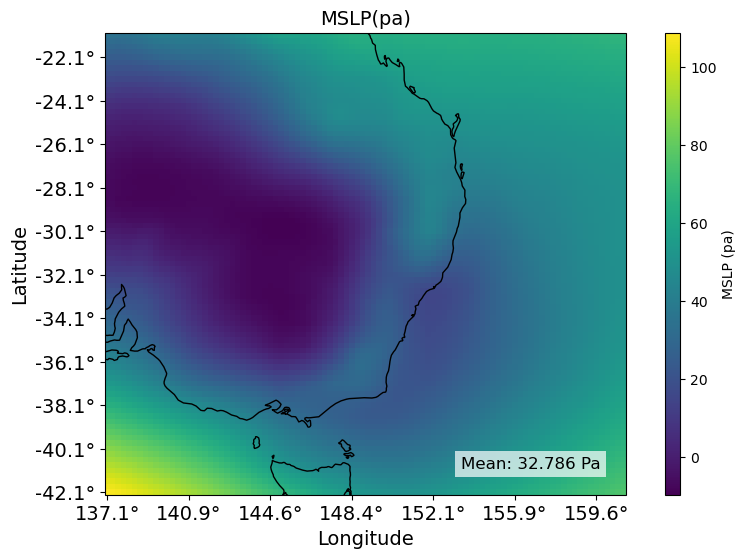

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

# Load your dataset (replace 'your_dataset.nc' with the actual file path)
ds = xr.open_dataset('/g/data/up6/gs5098/Project-2/deltas_model/ensemble_delta/cropped_warmmonthly_avg_psl.nc')

# Extract the 'tos' variable (if already loaded as a DataArray, you can skip this step)
hurs = ds['psl']

# Calculate domain mean value
domain_mean = np.nanmean(hurs.values)

# Plotting the data
plt.figure(figsize=(10, 6))

# Set up a map projection
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN, edgecolor='black')

# Define intervals for lat and lon
lon_ticks = hurs.lon.values[::15]  # Every 2nd longitude value
lat_ticks = hurs.lat.values[::8]  # Every 2nd latitude value

# Set lat and lon as xticks and yticks with intervals
ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

# Optionally, format tick labels for better readability
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.1f}°"))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.1f}°"))


# Add labels for lat and lon
ticks_formatter = ax.xaxis.get_major_formatter()
ax.xaxis.set_major_formatter(ticks_formatter)
ax.yaxis.set_major_formatter(ticks_formatter)

# Plot the data using pcolormesh
mesh = plt.pcolormesh(hurs.lon, hurs.lat, hurs, transform=ccrs.PlateCarree(), cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(mesh, orientation='vertical', pad=0.05, aspect=30)
cbar.set_label('MSLP (pa)')

# Add title and labels
plt.title('MSLP(pa)', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.xticks( fontsize=14)
plt.yticks( fontsize=14)

# Annotate domain mean value in the bottom right
ax.text(
    0.95, 0.05, f'Mean: {domain_mean:.3f} Pa', 
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='bottom',
    horizontalalignment='right',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
)

# Show the plot
plt.show()

In [1]:
import xarray as xr
dataset1 = xr.open_dataset('/g/data/up6/gs5098/Project-2/deltas_model/ensemble_delta/monthly_avg_hur.nc')
dataset2 = xr.open_dataset('/g/data/up6/gs5098/Project-2/deltas_model/ensemble_delta/warm_monthly_avg_hur.nc')

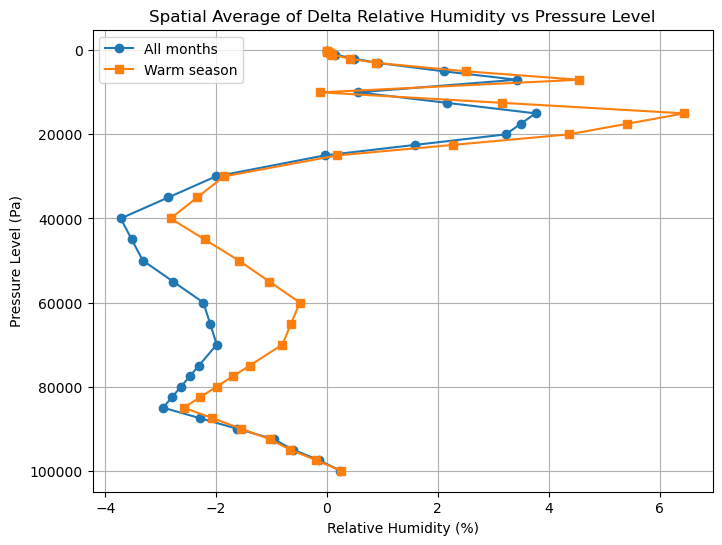

In [2]:
import xarray as xr
import matplotlib.pyplot as plt

# Assuming dataset1 and dataset2 are your datasets

# Calculate the spatial average for hur in both datasets
hur_mean1 = dataset1.hur.mean(dim=["lat", "lon"])
hur_mean2 = dataset2.hur.mean(dim=["lat", "lon"])

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(hur_mean1.values, hur_mean1['plev'], label='All months', marker='o')
plt.plot(hur_mean2.values, hur_mean2['plev'], label='Warm season', marker='s')

# Reverse the y-axis since pressure decreases upwards
plt.gca().invert_yaxis()

# Add labels, legend, and title
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Pressure Level (Pa)")
plt.title("Spatial Average of Delta Relative Humidity vs Pressure Level")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [3]:
import xarray as xr
dataset1 = xr.open_dataset('/g/data/up6/gs5098/Project-2/deltas_model/ensemble_delta/monthly_avg_ta.nc')
dataset2 = xr.open_dataset('/g/data/up6/gs5098/Project-2/deltas_model/ensemble_delta/warm_monthly_avg_ta.nc')

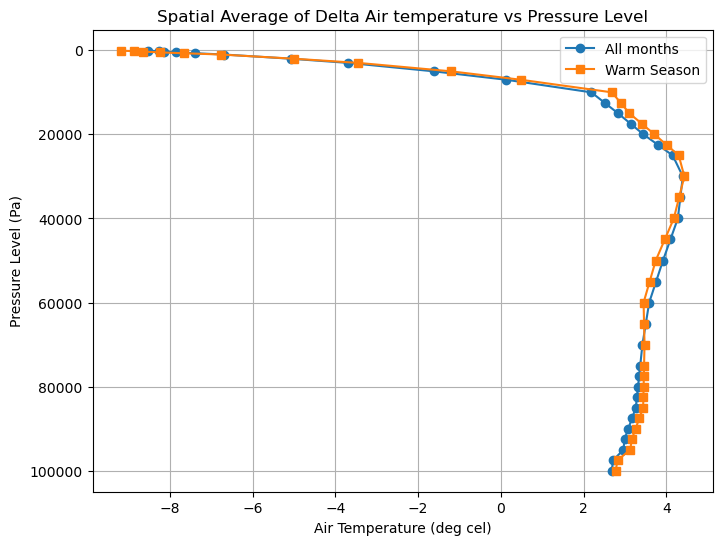

In [4]:
import xarray as xr
import matplotlib.pyplot as plt

# Assuming dataset1 and dataset2 are already defined and loaded

# Calculate the spatial average for hur in both datasets
hur_mean1 = dataset1.ta.mean(dim=["lat", "lon"])
hur_mean2 = dataset2.ta.mean(dim=["lat", "lon"])

# Ensure plev is aligned with hur_mean1 and hur_mean2
plev1 = hur_mean1['plev']
plev2 = hur_mean2['plev']

# Convert data to numpy arrays for plotting
hur_mean1_values = hur_mean1.values
hur_mean2_values = hur_mean2.values
plev1_values = plev1.values
plev2_values = plev2.values

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(hur_mean1_values, plev1_values, label='All months', marker='o')
plt.plot(hur_mean2_values, plev2_values, label='Warm Season', marker='s')

# Reverse the y-axis since pressure decreases upwards
plt.gca().invert_yaxis()

# Add labels, legend, and title
plt.xlabel("Air Temperature (deg cel)")
plt.ylabel("Pressure Level (Pa)")
plt.title("Spatial Average of Delta Air temperature vs Pressure Level")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [1]:
import xarray as xr
dataset1 = xr.open_dataset('/g/data/up6/gs5098/Project-2/deltas_model/ensemble_delta/monthly_avg_ua.nc')
dataset2 = xr.open_dataset('/g/data/up6/gs5098/Project-2/deltas_model/ensemble_delta/warmmonthly_avg_ua.nc')

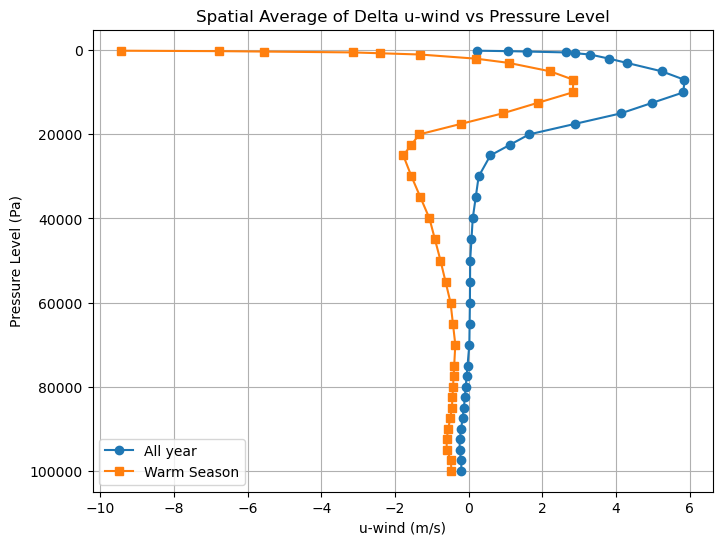

In [2]:
import xarray as xr
import matplotlib.pyplot as plt

# Assuming dataset1 and dataset2 are already defined and loaded

# Calculate the spatial average for hur in both datasets
hur_mean1 = dataset1.ua.mean(dim=["lat", "lon"])
hur_mean2 = dataset2.ua.mean(dim=["lat", "lon"])

# Ensure plev is aligned with hur_mean1 and hur_mean2
plev1 = hur_mean1['plev']
plev2 = hur_mean2['plev']

# Convert data to numpy arrays for plotting
hur_mean1_values = hur_mean1.values
hur_mean2_values = hur_mean2.values
plev1_values = plev1.values
plev2_values = plev2.values

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(hur_mean1_values, plev1_values, label='All year', marker='o')
plt.plot(hur_mean2_values, plev2_values, label='Warm Season', marker='s')

# Reverse the y-axis since pressure decreases upwards
plt.gca().invert_yaxis()

# Add labels, legend, and title
plt.xlabel("u-wind (m/s)")
plt.ylabel("Pressure Level (Pa)")
plt.title("Spatial Average of Delta u-wind vs Pressure Level")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [3]:
import xarray as xr
dataset1 = xr.open_dataset('/g/data/up6/gs5098/Project-2/deltas_model/ensemble_delta/monthly_avg_va.nc')
dataset2 = xr.open_dataset('/g/data/up6/gs5098/Project-2/deltas_model/ensemble_delta/warmmonthly_avg_va.nc')

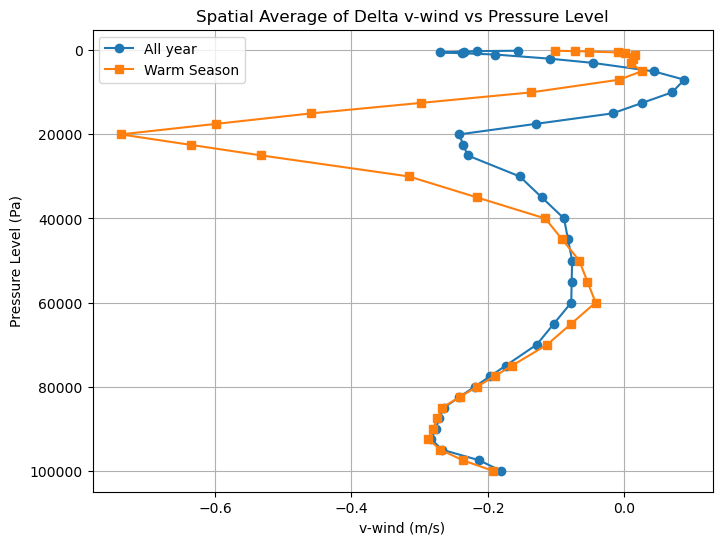

In [4]:
import xarray as xr
import matplotlib.pyplot as plt

# Assuming dataset1 and dataset2 are already defined and loaded

# Calculate the spatial average for hur in both datasets
hur_mean1 = dataset1.va.mean(dim=["lat", "lon"])
hur_mean2 = dataset2.va.mean(dim=["lat", "lon"])

# Ensure plev is aligned with hur_mean1 and hur_mean2
plev1 = hur_mean1['plev']
plev2 = hur_mean2['plev']

# Convert data to numpy arrays for plotting
hur_mean1_values = hur_mean1.values
hur_mean2_values = hur_mean2.values
plev1_values = plev1.values
plev2_values = plev2.values

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(hur_mean1_values, plev1_values, label='All year', marker='o')
plt.plot(hur_mean2_values, plev2_values, label='Warm Season', marker='s')

# Reverse the y-axis since pressure decreases upwards
plt.gca().invert_yaxis()

# Add labels, legend, and title
plt.xlabel("v-wind (m/s)")
plt.ylabel("Pressure Level (Pa)")
plt.title("Spatial Average of Delta v-wind vs Pressure Level")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [5]:
import xarray as xr
dataset1 = xr.open_dataset('/g/data/up6/gs5098/Project-2/deltas_model/ensemble_delta/monthly_avg_zg.nc')
dataset2 = xr.open_dataset('/g/data/up6/gs5098/Project-2/deltas_model/ensemble_delta/warmmonthly_avg_zg.nc')

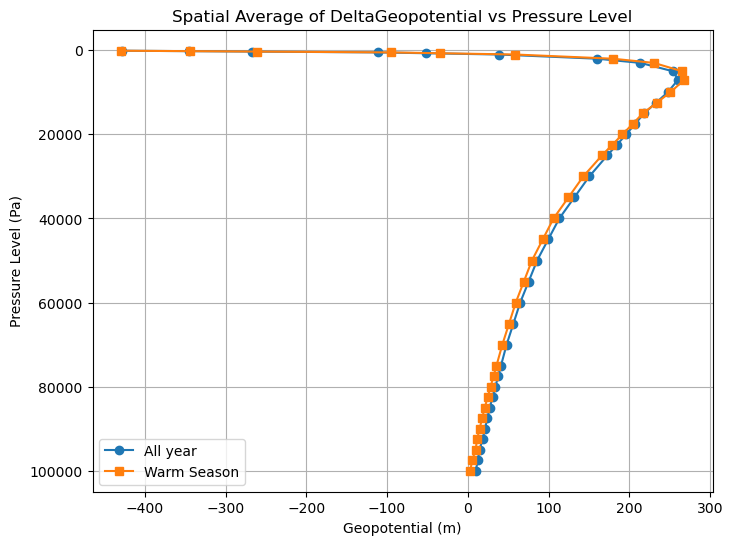

In [6]:
import xarray as xr
import matplotlib.pyplot as plt

# Assuming dataset1 and dataset2 are already defined and loaded

# Calculate the spatial average for hur in both datasets
hur_mean1 = dataset1.zg.mean(dim=["lat", "lon"])
hur_mean2 = dataset2.zg.mean(dim=["lat", "lon"])

# Ensure plev is aligned with hur_mean1 and hur_mean2
plev1 = hur_mean1['plev']
plev2 = hur_mean2['plev']

# Convert data to numpy arrays for plotting
hur_mean1_values = hur_mean1.values
hur_mean2_values = hur_mean2.values
plev1_values = plev1.values
plev2_values = plev2.values

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(hur_mean1_values, plev1_values, label='All year', marker='o')
plt.plot(hur_mean2_values, plev2_values, label='Warm Season', marker='s')

# Reverse the y-axis since pressure decreases upwards
plt.gca().invert_yaxis()

# Add labels, legend, and title
plt.xlabel("Geopotential (m)")
plt.ylabel("Pressure Level (Pa)")
plt.title("Spatial Average of DeltaGeopotential vs Pressure Level")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Variable deltas on different pressure levels - for every model

In [1]:
import xarray as xr
dataset2 = xr.open_dataset('/g/data/up6/gs5098/Project-2/deltas_model/monthly_mean/ta/ACCESS-CM2_ta.nc')
print(dataset2)

<xarray.Dataset> Size: 8MB
Dimensions:  (lon: 82, lat: 52, plev: 37, month: 12)
Coordinates:
  * lon      (lon) float64 656B 139.6 139.9 140.1 140.4 ... 159.4 159.6 159.9
  * lat      (lat) float64 416B -39.38 -39.12 -38.88 ... -27.12 -26.88 -26.62
  * plev     (plev) float64 296B 1e+05 9.75e+04 9.5e+04 ... 300.0 200.0 100.0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    ta       (month, plev, lat, lon) float32 8MB ...


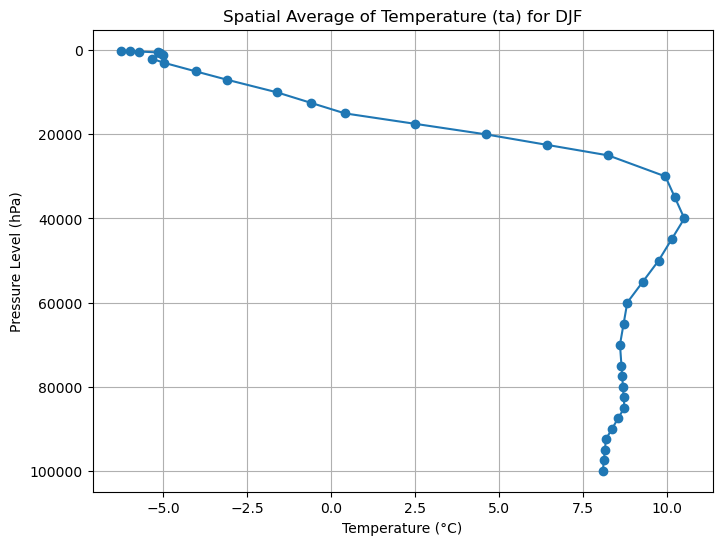

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

# Path to the dataset
file_path = '/g/data/up6/gs5098/Project-2/deltas_model/monthly_mean/ta/EC-Earth3_ta.nc'

# Open the dataset
dataset2 = xr.open_dataset(file_path)

# Select DJF months (December = 12, January = 1, February = 2)
ta_djf = dataset2.ta.sel(month=[12, 1, 2])

# Average over the selected months
ta_djf_mean = ta_djf.mean(dim='month')

# Calculate the spatial average (average over lat and lon)
ta_spatial_avg = ta_djf_mean.mean(dim=['lat', 'lon'])

# Plotting the spatial average as a function of pressure levels
plt.figure(figsize=(8, 6))
plt.plot(ta_spatial_avg, ta_spatial_avg.plev, marker='o')
plt.gca().invert_yaxis()  # Invert y-axis to show pressure decreasing upwards
plt.xlabel('Temperature (°C)')
plt.ylabel('Pressure Level (hPa)')
plt.title('Spatial Average of Temperature (ta) for DJF')
plt.grid(True)
plt.show()


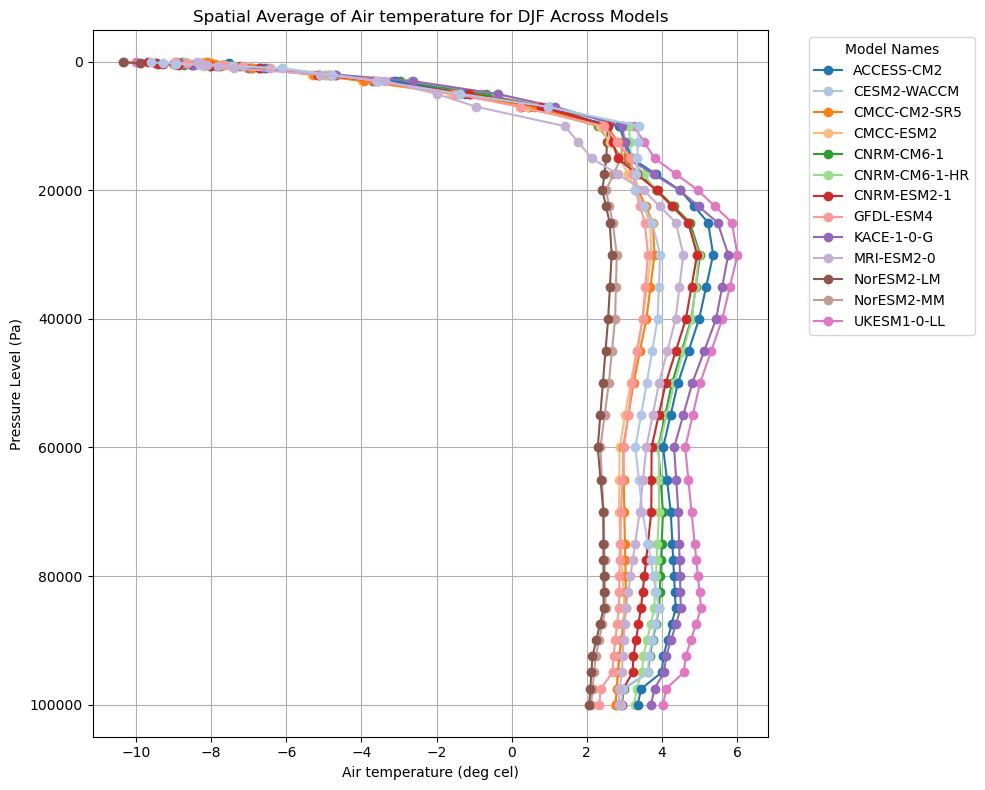

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
import os
import numpy as np

# Path to the folder containing the NetCDF files
data_path = '/g/data/up6/gs5098/Project-2/delta/deltas_model/monthly_mean/cropped/ta/'

# List all files matching the pattern <modelname>_hur.nc
file_list = glob(os.path.join(data_path, '*_ta.nc'))

# Extract model names from files
model_names = [os.path.basename(file).split('_')[0] for file in file_list]

# Generate a fixed colormap based on unique model names
unique_models = sorted(set(model_names))  # Sort model names alphabetically
color_map = dict(zip(unique_models, plt.cm.tab20(np.arange(len(unique_models)) % 20)))

# Plotting setup
plt.figure(figsize=(10, 8))

# Loop through each file and plot data
for file in file_list:
    # Extract model name from filename
    model_name = os.path.basename(file).split('_')[0]
    
    # Open the dataset
    dataset = xr.open_dataset(file)
    
    # Select DJF months (December = 12, January = 1, February = 2)
    hur_djf = dataset.ta.sel(month=[12, 1, 2])
    
    # Calculate the average over DJF months
    hur_djf_mean = hur_djf.mean(dim='month')
    
    # Calculate the spatial average (average over lat and lon)
    hur_spatial_avg = hur_djf_mean.mean(dim=['lat', 'lon'])
    
    # Plot the profile for each model with a fixed color
    plt.plot(
        hur_spatial_avg, 
        hur_spatial_avg.plev, 
        label=model_name, 
        marker='o', 
        color=color_map[model_name]
    )

# Invert y-axis to show pressure decreasing upwards
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Air temperature (deg cel)')
plt.ylabel('Pressure Level (Pa)')
plt.title('Spatial Average of Air temperature for DJF Across Models')
plt.grid(True)
# plt.xticks()
# plt.yticks()

# Create legend and sort it alphabetically
handles, labels = plt.gca().get_legend_handles_labels()
sorted_indices = np.argsort(labels)  # Sort labels
plt.legend(
    [handles[i] for i in sorted_indices],
    [labels[i] for i in sorted_indices],
    title='Model Names',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Show the plot
plt.tight_layout()
plt.show()


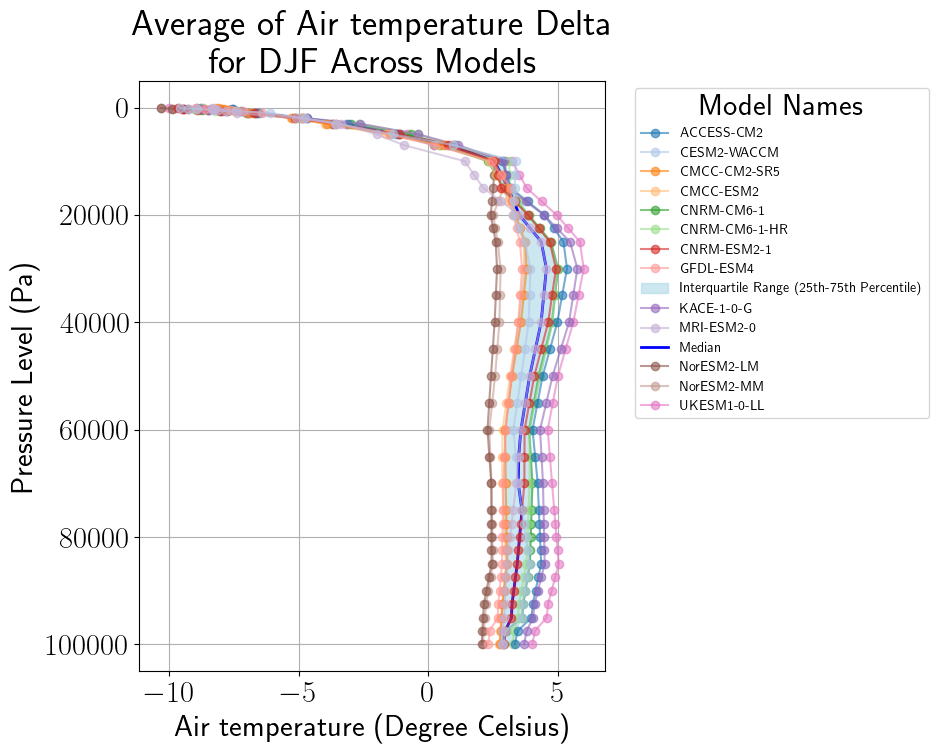

In [25]:
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
import os
import numpy as np

plt.rcParams.update({"text.usetex": True, "font.size": 22})

# Path to the folder containing the NetCDF files
data_path = '/g/data/up6/gs5098/Project-2/delta/deltas_model/monthly_mean/cropped/ta/'

# List all files matching the pattern <modelname>_hur.nc
file_list = glob(os.path.join(data_path, '*_ta.nc'))

# Extract model names from files
model_names = [os.path.basename(file).split('_')[0] for file in file_list]

# Generate a fixed colormap based on unique model names
unique_models = sorted(set(model_names))  # Sort model names alphabetically
color_map = dict(zip(unique_models, plt.cm.tab20(np.arange(len(unique_models)) % 20)))

# Prepare a list to store spatial averages for all models
spatial_avg_list = []

# Loop through each file and calculate spatial averages
for file in file_list:
    # Open the dataset
    dataset = xr.open_dataset(file)
    
    # Select DJF months (December = 12, January = 1, February = 2)
    hur_djf = dataset.ta.sel(month=[12, 1, 2])
    
    # Calculate the average over DJF months
    hur_djf_mean = hur_djf.mean(dim='month')
    
    # Calculate the spatial average (average over lat and lon)
    hur_spatial_avg = hur_djf_mean.mean(dim=['lat', 'lon'])
    
    # Append the spatial average to the list
    spatial_avg_list.append(hur_spatial_avg)

# Combine all spatial averages into a single xarray.DataArray
spatial_avg_all = xr.concat(spatial_avg_list, dim='model')

# Compute statistics across models
median_hur = spatial_avg_all.median(dim='model')
q25_hur = spatial_avg_all.quantile(0.25, dim='model')
q75_hur = spatial_avg_all.quantile(0.75, dim='model')
min_hur = spatial_avg_all.min(dim='model')
max_hur = spatial_avg_all.max(dim='model')

# Plotting setup
plt.figure(figsize=(10, 8))

# Plot the full range (min-max) as a lighter shaded area
# plt.fill_betweenx(
#     median_hur.plev, 
#     min_hur, 
#     max_hur, 
#     color='lightgray', 
#     alpha=0.6, 
#     label='Full Range (Min-Max)'
# )

# Plot the interquartile range as a shaded area
plt.fill_betweenx(
    median_hur.plev, 
    q25_hur, 
    q75_hur, 
    color='lightblue', 
    alpha=0.6, 
    label='Interquartile Range (25th-75th Percentile)'
)

# Plot the median line
plt.plot(median_hur, median_hur.plev, color='blue', linewidth=2, label='Median')

# Plot individual model profiles
for file in file_list:
    # Extract model name from filename
    model_name = os.path.basename(file).split('_')[0]
    
    # Get the corresponding spatial average
    index = model_names.index(model_name)
    spatial_avg = spatial_avg_list[index]
    
    # Plot the profile for each model with a fixed color
    plt.plot(
        spatial_avg, 
        spatial_avg.plev, 
        label=model_name, 
        marker='o', 
        color=color_map[model_name],
        alpha=0.6
    )

# Invert y-axis to show pressure decreasing upwards
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Air temperature (Degree Celsius)')
plt.ylabel('Pressure Level (Pa)')
plt.title('Average of Air temperature Delta\nfor DJF Across Models')
plt.grid(True)
plt.xticks()
plt.yticks()

# Create legend and sort it alphabetically
handles, labels = plt.gca().get_legend_handles_labels()
sorted_indices = np.argsort(labels)  # Sort labels
plt.legend(
    [handles[i] for i in sorted_indices],
    [labels[i] for i in sorted_indices],
    title='Model Names',
    bbox_to_anchor=(1.05, 1),
    loc='upper left', fontsize = 10
)

# Show the plot
plt.tight_layout()
plt.show()


NameError: name 'fontsize' is not defined

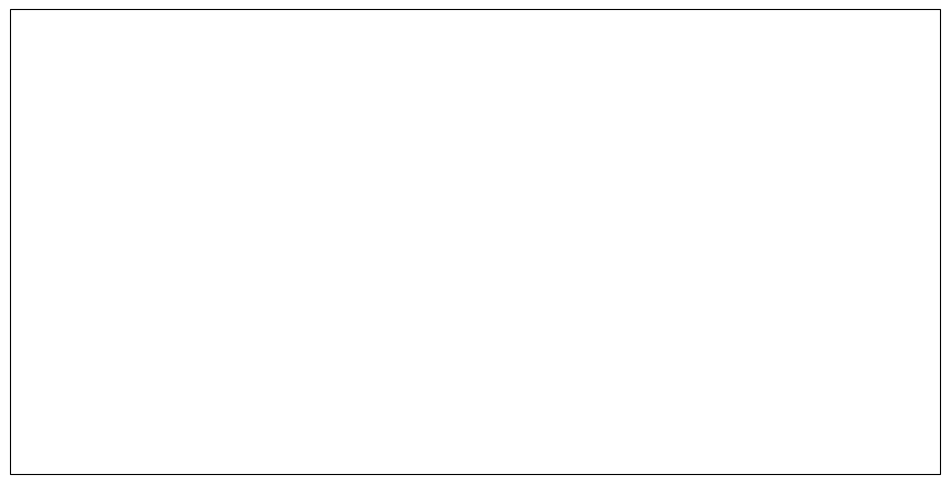

In [42]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.rcParams.update({"text.usetex": True, "font.size": 22})

# Path to NetCDF files
data_path = '/g/data/up6/gs5098/Project-2/delta/deltas_model/monthly_mean/cropped/ta/'
file_list = glob(os.path.join(data_path, '*_ta.nc'))

# List to store 2D fields for 100000 Pa from all models
ta_1000hPa_list = []

for file in file_list:
    ds = xr.open_dataset(file)

    # Select DJF months
    ta_djf = ds.ta.sel(month=[12, 1, 2])

    # Take mean over the DJF months
    ta_djf_mean = ta_djf.mean(dim='month')

    # Select the pressure level 100000 Pa (1000 hPa)
    ta_1000hPa = ta_djf_mean.sel(plev=100000)

    # Append to list
    ta_1000hPa_list.append(ta_1000hPa)

# Stack across models and take the mean
ta_1000hPa_all = xr.concat(ta_1000hPa_list, dim='model')
ta_1000hPa_avg = ta_1000hPa_all.mean(dim='model')

# Compute the overall spatial mean
spatial_mean = float(ta_1000hPa_avg.mean().values)
mean_str = f"Mean: {spatial_mean:.2f} °C"

# Plotting
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot with longitude (x) and latitude (y)
im = ta_1000hPa_avg.plot(
    ax=ax,
    cmap='coolwarm',
    cbar_kwargs={'label': 'Air Temperature (°C)', fontsize :20},
    transform=ccrs.PlateCarree(),
    add_labels=False
)
ax.set_title('.', fontsize=1)
# Axis labels
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude', )

# Add dummy plot for legend annotation
dummy = ax.plot([], [], label=mean_str, color='none')[0]
ax.legend(handles=[dummy], loc='lower right', fontsize=18)

plt.tight_layout()
plt.show()


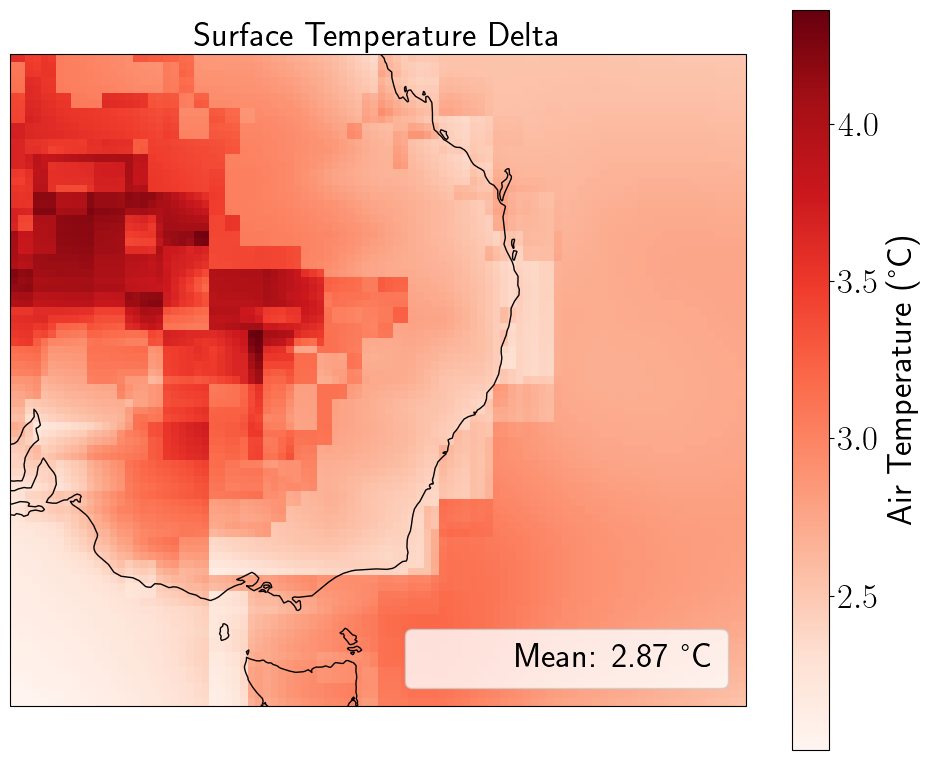

In [53]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.rcParams.update({"text.usetex": True, "font.size": 25})

# Path to NetCDF files
data_path = '/g/data/up6/gs5098/Project-2/delta/deltas_model/monthly_mean/cropped/ta/'
file_list = glob(os.path.join(data_path, '*_ta.nc'))

ta_1000hPa_list = []

for file in file_list:
    ds = xr.open_dataset(file)

    # Select DJF months and average
    ta_djf = ds.ta.sel(month=[12, 1, 2]).mean(dim='month')

    # Select pressure level 100000 Pa
    ta_1000hPa = ta_djf.sel(plev=100000)

    # Convert Kelvin to Celsius (optional if not already in °C)
    if ta_1000hPa.max() > 100:
        ta_1000hPa -= 273.15

    ta_1000hPa_list.append(ta_1000hPa)

# Combine and average across models
ta_1000hPa_all = xr.concat(ta_1000hPa_list, dim='model')
ta_1000hPa_avg = ta_1000hPa_all.mean(dim='model')

# Compute spatial mean for annotation
spatial_mean = float(ta_1000hPa_avg.mean().values)
mean_str = f"Mean: {spatial_mean:.2f} °C"

# Plotting
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot and capture the colorbar object
p = ta_1000hPa_avg.plot(
    ax=ax,
    x='lon',
    y='lat',
    cmap='Reds',
    cbar_kwargs={
        'label': 'Air Temperature (°C)',
        'shrink': 0.8  # optional, adjust size of colorbar
    },
    transform=ccrs.PlateCarree()
)

# Set fontsize of colorbar tick labels
p.colorbar.ax.tick_params(labelsize=25)

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title('Surface Temperature Delta', fontsize=25)

# Add mean annotation to legend
dummy = ax.plot([], [], label=mean_str, color='none')[0]
ax.legend(handles=[dummy], loc='lower right', fontsize=25)

plt.tight_layout()
plt.show()


In [50]:
tt = xr.open_dataset('/g/data/up6/gs5098/Project-2/delta/deltas_model/monthly_mean/cropped/ta/UKESM1-0-LL_ta.nc')
tt

<xarray.Dataset> Size: 14MB
Dimensions:  (lon: 96, lat: 85, plev: 37, month: 12)
Coordinates:
  * lon      (lon) float64 768B 137.1 137.4 137.6 137.9 ... 160.4 160.6 160.9
  * lat      (lat) float64 680B -42.12 -41.88 -41.62 ... -21.62 -21.38 -21.12
  * plev     (plev) float64 296B 1e+05 9.75e+04 9.5e+04 ... 300.0 200.0 100.0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    ta       (month, plev, lat, lon) float32 14MB ...

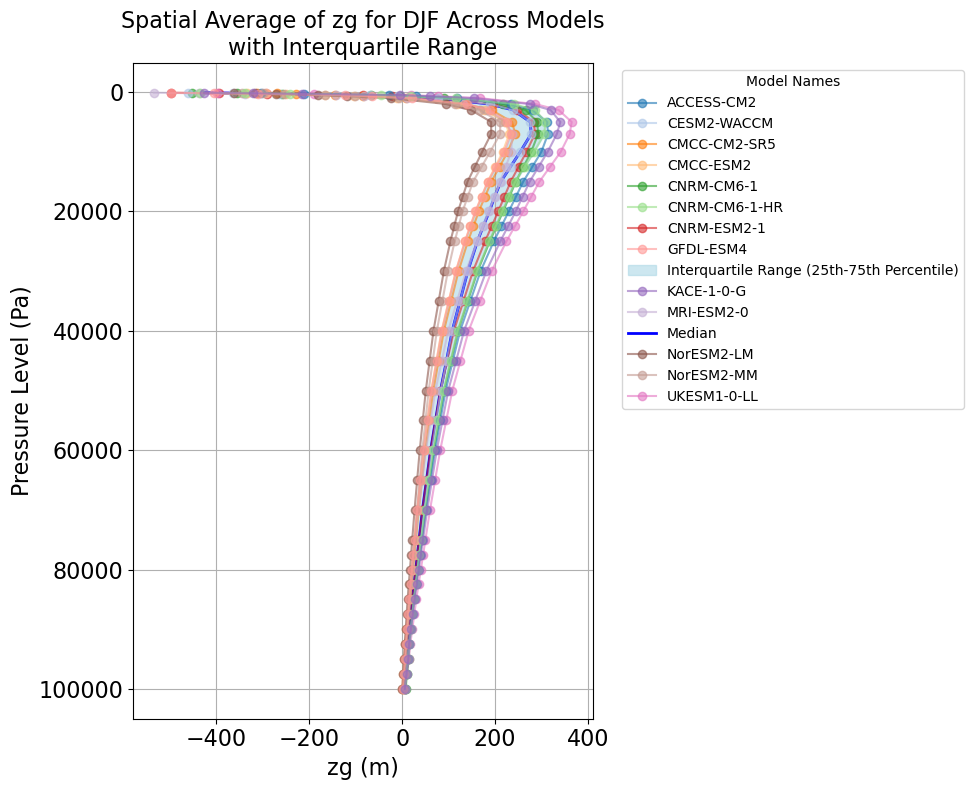

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
import os
import numpy as np

# Path to the folder containing the NetCDF files
data_path = '/g/data/up6/gs5098/Project-2/delta/deltas_model/monthly_mean/cropped/zg/'

# List all files matching the pattern <modelname>_hur.nc
file_list = glob(os.path.join(data_path, '*_zg.nc'))

# Extract model names from files
model_names = [os.path.basename(file).split('_')[0] for file in file_list]

# Generate a fixed colormap based on unique model names
unique_models = sorted(set(model_names))  # Sort model names alphabetically
color_map = dict(zip(unique_models, plt.cm.tab20(np.arange(len(unique_models)) % 20)))

# Prepare a list to store spatial averages for all models
spatial_avg_list = []

# Loop through each file and calculate spatial averages
for file in file_list:
    # Open the dataset
    dataset = xr.open_dataset(file)
    
    # Select DJF months (December = 12, January = 1, February = 2)
    hur_djf = dataset.zg.sel(month=[12, 1, 2])
    
    # Calculate the average over DJF months
    hur_djf_mean = hur_djf.mean(dim='month')
    
    # Calculate the spatial average (average over lat and lon)
    hur_spatial_avg = hur_djf_mean.mean(dim=['lat', 'lon'])
    
    # Append the spatial average to the list
    spatial_avg_list.append(hur_spatial_avg)

# Combine all spatial averages into a single xarray.DataArray
spatial_avg_all = xr.concat(spatial_avg_list, dim='model')

# Compute statistics across models
median_hur = spatial_avg_all.median(dim='model')
q25_hur = spatial_avg_all.quantile(0.25, dim='model')
q75_hur = spatial_avg_all.quantile(0.75, dim='model')
min_hur = spatial_avg_all.min(dim='model')
max_hur = spatial_avg_all.max(dim='model')

# Plotting setup
plt.figure(figsize=(10, 8))

# Plot the full range (min-max) as a lighter shaded area
# plt.fill_betweenx(
#     median_hur.plev, 
#     min_hur, 
#     max_hur, 
#     color='lightgray', 
#     alpha=0.6, 
#     label='Full Range (Min-Max)'
# )

# Plot the interquartile range as a shaded area
plt.fill_betweenx(
    median_hur.plev, 
    q25_hur, 
    q75_hur, 
    color='lightblue', 
    alpha=0.6, 
    label='Interquartile Range (25th-75th Percentile)'
)

# Plot the median line
plt.plot(median_hur, median_hur.plev, color='blue', linewidth=2, label='Median')

# Plot individual model profiles
for file in file_list:
    # Extract model name from filename
    model_name = os.path.basename(file).split('_')[0]
    
    # Get the corresponding spatial average
    index = model_names.index(model_name)
    spatial_avg = spatial_avg_list[index]
    
    # Plot the profile for each model with a fixed color
    plt.plot(
        spatial_avg, 
        spatial_avg.plev, 
        label=model_name, 
        marker='o', 
        color=color_map[model_name],
        alpha=0.6
    )

# Invert y-axis to show pressure decreasing upwards
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('zg (m)', fontsize = 16)
plt.ylabel('Pressure Level (Pa)', fontsize = 16)
plt.title('Spatial Average of zg for DJF Across Models\nwith Interquartile Range', fontsize = 16)
plt.grid(True)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

# Create legend and sort it alphabetically
handles, labels = plt.gca().get_legend_handles_labels()
sorted_indices = np.argsort(labels)  # Sort labels
plt.legend(
    [handles[i] for i in sorted_indices],
    [labels[i] for i in sorted_indices],
    title='Model Names',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Show the plot
plt.tight_layout()
plt.show()

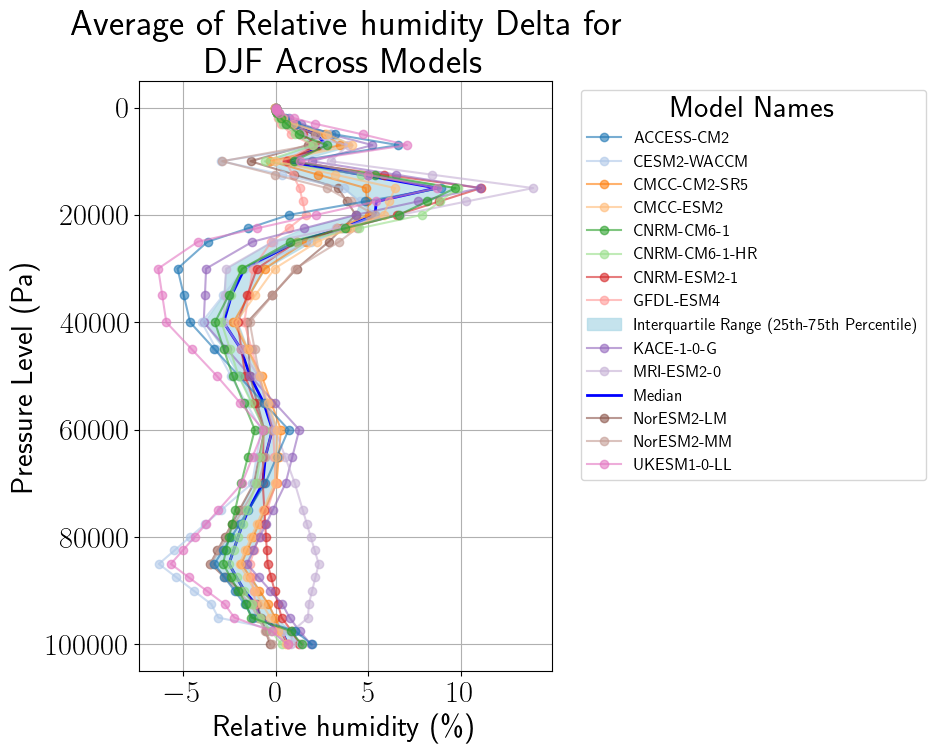

In [23]:
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
import os
import numpy as np

plt.rcParams.update({"text.usetex": True, "font.size": 22})
# Path to the folder containing the NetCDF files
data_path = '/g/data/up6/gs5098/Project-2/delta/deltas_model/monthly_mean/cropped/hur/'

# List all files matching the pattern <modelname>_ta.nc
file_list = glob(os.path.join(data_path, '*_hur.nc'))

# Extract model names from files
model_names = [os.path.basename(file).split('_')[0] for file in file_list]

# Generate a fixed colormap based on unique model names
unique_models = sorted(set(model_names))  # Sort model names alphabetically
color_map = dict(zip(unique_models, plt.cm.tab20(np.arange(len(unique_models)) % 20)))

# Prepare a list to store spatial averages for all models
spatial_avg_list = []

# Loop through each file and calculate spatial averages
for file in file_list:
    # Open the dataset
    dataset = xr.open_dataset(file)
    
    # Select DJF months (December = 12, January = 1, February = 2)
    ta_djf = dataset.hur.sel(month=[12, 1, 2])
    
    # Calculate the average over DJF months
    ta_djf_mean = ta_djf.mean(dim='month')
    
    # Calculate the spatial average (average over lat and lon)
    ta_spatial_avg = ta_djf_mean.mean(dim=['lat', 'lon'])
    
    # Append the spatial average to the list
    spatial_avg_list.append(ta_spatial_avg)

# Combine all spatial averages into a single xarray.DataArray
spatial_avg_all = xr.concat(spatial_avg_list, dim='model')

# Compute statistics across models
median_ta = spatial_avg_all.median(dim='model')
q25_ta = spatial_avg_all.quantile(0.25, dim='model')
q75_ta = spatial_avg_all.quantile(0.75, dim='model')

# Plotting setup
plt.figure(figsize=(10, 8))

# Plot the interquartile range as a shaded area
plt.fill_betweenx(
    median_ta.plev, 
    q25_ta, 
    q75_ta, 
    color='lightblue', 
    alpha=0.7, 
    label='Interquartile Range (25th-75th Percentile)'
)

# Plot the median line
plt.plot(median_ta, median_ta.plev, color='blue', linewidth=2, label='Median')

# Plot individual model profiles
for file in file_list:
    # Extract model name from filename
    model_name = os.path.basename(file).split('_')[0]
    
    # Get the corresponding spatial average
    index = model_names.index(model_name)
    spatial_avg = spatial_avg_list[index]
    
    # Plot the profile for each model with a fixed color
    plt.plot(
        spatial_avg, 
        spatial_avg.plev, 
        label=model_name, 
        marker='o', 
        color=color_map[model_name],
        alpha=0.6
    )

# Invert y-axis to show pressure decreasing upwards
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Relative humidity (\%)')
plt.ylabel('Pressure Level (Pa)')
plt.title('Average of Relative humidity Delta for \nDJF Across Models')
plt.grid(True)

plt.xticks((np.arange(-5, 11, 5)))
plt.yticks()

# Create legend and sort it alphabetically
handles, labels = plt.gca().get_legend_handles_labels()
sorted_indices = np.argsort(labels)  # Sort labels
plt.legend(
    [handles[i] for i in sorted_indices],
    [labels[i] for i in sorted_indices],
    title='Model Names',
    bbox_to_anchor=(1.05, 1),
    loc='upper left', fontsize = 12
)

# Show the plot
plt.tight_layout()
plt.show()


In [12]:
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
import os
import numpy as np

# Path to the folder containing the NetCDF files
data_path = '/g/data/up6/gs5098/Project-2/deltas_model/monthly_mean/hur/'

# List all files matching the pattern <modelname>_hur.nc
file_list = glob(os.path.join(data_path, '*_hur.nc'))

# Extract model names from files
model_names = [os.path.basename(file).split('_')[0] for file in file_list]

# Generate a fixed colormap based on unique model names
unique_models = sorted(set(model_names))  # Sort model names alphabetically
color_map = dict(zip(unique_models, plt.cm.tab20(np.arange(len(unique_models)) % 20)))

# Prepare a list to store spatial averages for all models
spatial_avg_list = []

# Loop through each file and calculate spatial averages
for file in file_list:
    # Open the dataset
    dataset = xr.open_dataset(file)
    
    # Select DJF months (December = 12, January = 1, February = 2)
    hur_djf = dataset.hur.sel(month=[12, 1, 2])
    
    # Calculate the average over DJF months
    hur_djf_mean = hur_djf.mean(dim='month')
    
    # Calculate the spatial average (average over lat and lon)
    hur_spatial_avg = hur_djf_mean.mean(dim=['lat', 'lon'])
    
    # Append the spatial average to the list
    spatial_avg_list.append(hur_spatial_avg)

# Combine all spatial averages into a single xarray.DataArray
spatial_avg_all = xr.concat(spatial_avg_list, dim='model')

# Compute statistics across models
median_hur = spatial_avg_all.median(dim='model')
q25_hur = spatial_avg_all.quantile(0.25, dim='model')
q75_hur = spatial_avg_all.quantile(0.75, dim='model')
min_hur = spatial_avg_all.min(dim='model')
max_hur = spatial_avg_all.max(dim='model')

# Plotting setup
plt.figure(figsize=(10, 8))

# Plot the full range (min-max) as a lighter shaded area
# plt.fill_betweenx(
#     median_hur.plev, 
#     min_hur, 
#     max_hur, 
#     color='lightgray', 
#     alpha=0.4, 
#     label='Full Range (Min-Max)'
# )

# Plot the interquartile range as a shaded area
plt.fill_betweenx(
    median_hur.plev, 
    q25_hur, 
    q75_hur, 
    color='lightblue', 
    alpha=0.5, 
    label='Interquartile Range (25th-75th Percentile)'
)

# Plot the median line
plt.plot(median_hur, median_hur.plev, color='blue', linewidth=2, label='Median')

# Plot individual model profiles
for file in file_list:
    # Extract model name from filename
    model_name = os.path.basename(file).split('_')[0]
    
    # Get the corresponding spatial average
    index = model_names.index(model_name)
    spatial_avg = spatial_avg_list[index]
    
    # Plot the profile for each model with a fixed color
    plt.plot(
        spatial_avg, 
        spatial_avg.plev, 
        label=model_name, 
        marker='o', 
        color=color_map[model_name],
        alpha=0.6
    )

# Invert y-axis to show pressure decreasing upwards
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Pressure Level (Pa)')
plt.title('Spatial Average of Relative Humidity for DJF Across Models\nwith Full Range and Interquartile Range')
plt.grid(True)

# Create legend and sort it alphabetically
handles, labels = plt.gca().get_legend_handles_labels()
sorted_indices = np.argsort(labels)  # Sort labels
plt.legend(
    [handles[i] for i in sorted_indices],
    [labels[i] for i in sorted_indices],
    title='Model Names',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Show the plot
plt.tight_layout()
plt.show()


ValueError: must supply at least one object to concatenate

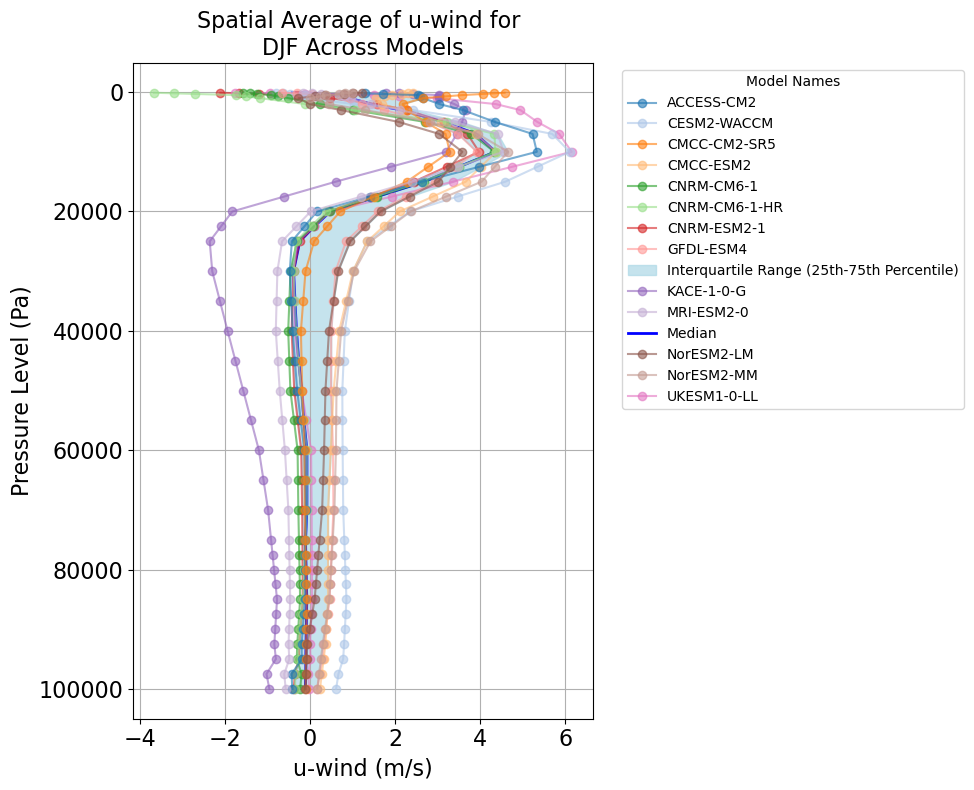

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
import os
import numpy as np

# Path to the folder containing the NetCDF files
data_path = '/g/data/up6/gs5098/Project-2/delta/deltas_model/monthly_mean/cropped/ua/'

# List all files matching the pattern <modelname>_ta.nc
file_list = glob(os.path.join(data_path, '*_ua.nc'))

# Extract model names from files
model_names = [os.path.basename(file).split('_')[0] for file in file_list]

# Generate a fixed colormap based on unique model names
unique_models = sorted(set(model_names))  # Sort model names alphabetically
color_map = dict(zip(unique_models, plt.cm.tab20(np.arange(len(unique_models)) % 20)))

# Prepare a list to store spatial averages for all models
spatial_avg_list = []

# Loop through each file and calculate spatial averages
for file in file_list:
    # Open the dataset
    dataset = xr.open_dataset(file)
    
    # Select DJF months (December = 12, January = 1, February = 2)
    ta_djf = dataset.ua.sel(month=[12, 1, 2])
    
    # Calculate the average over DJF months
    ta_djf_mean = ta_djf.mean(dim='month')
    
    # Calculate the spatial average (average over lat and lon)
    ta_spatial_avg = ta_djf_mean.mean(dim=['lat', 'lon'])
    
    # Append the spatial average to the list
    spatial_avg_list.append(ta_spatial_avg)

# Combine all spatial averages into a single xarray.DataArray
spatial_avg_all = xr.concat(spatial_avg_list, dim='model')

# Compute statistics across models
median_ta = spatial_avg_all.median(dim='model')
q25_ta = spatial_avg_all.quantile(0.25, dim='model')
q75_ta = spatial_avg_all.quantile(0.75, dim='model')

# Plotting setup
plt.figure(figsize=(10, 8))

# Plot the interquartile range as a shaded area
plt.fill_betweenx(
    median_ta.plev, 
    q25_ta, 
    q75_ta, 
    color='lightblue', 
    alpha=0.7, 
    label='Interquartile Range (25th-75th Percentile)'
)

# Plot the median line
plt.plot(median_ta, median_ta.plev, color='blue', linewidth=2, label='Median')

# Plot individual model profiles
for file in file_list:
    # Extract model name from filename
    model_name = os.path.basename(file).split('_')[0]
    
    # Get the corresponding spatial average
    index = model_names.index(model_name)
    spatial_avg = spatial_avg_list[index]
    
    # Plot the profile for each model with a fixed color
    plt.plot(
        spatial_avg, 
        spatial_avg.plev, 
        label=model_name, 
        marker='o', 
        color=color_map[model_name],
        alpha=0.6
    )

# Invert y-axis to show pressure decreasing upwards
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('u-wind (m/s)', fontsize = 16)
plt.ylabel('Pressure Level (Pa)', fontsize = 16)
plt.title('Spatial Average of u-wind for \nDJF Across Models', fontsize = 16)
plt.grid(True)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

# Create legend and sort it alphabetically
handles, labels = plt.gca().get_legend_handles_labels()
sorted_indices = np.argsort(labels)  # Sort labels
plt.legend(
    [handles[i] for i in sorted_indices],
    [labels[i] for i in sorted_indices],
    title='Model Names',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Show the plot
plt.tight_layout()
plt.show()


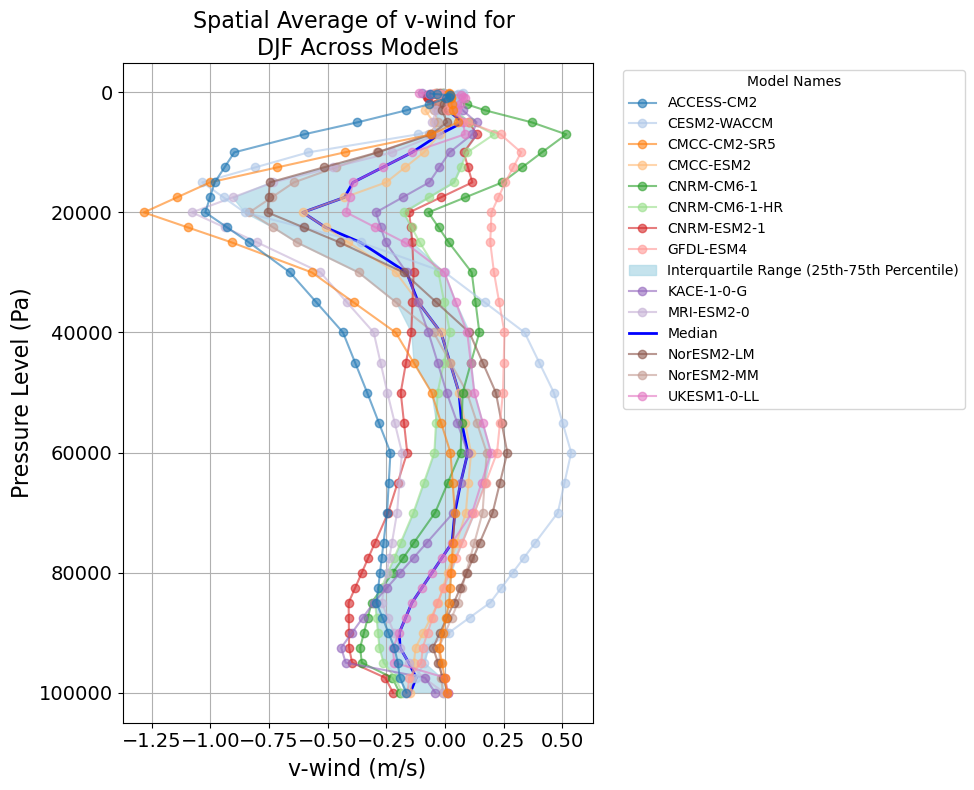

In [10]:
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
import os
import numpy as np

# Path to the folder containing the NetCDF files
data_path = '/g/data/up6/gs5098/Project-2/delta/deltas_model/monthly_mean/cropped/va/'

# List all files matching the pattern <modelname>_ta.nc
file_list = glob(os.path.join(data_path, '*_va.nc'))

# Extract model names from files
model_names = [os.path.basename(file).split('_')[0] for file in file_list]

# Generate a fixed colormap based on unique model names
unique_models = sorted(set(model_names))  # Sort model names alphabetically
color_map = dict(zip(unique_models, plt.cm.tab20(np.arange(len(unique_models)) % 20)))

# Prepare a list to store spatial averages for all models
spatial_avg_list = []

# Loop through each file and calculate spatial averages
for file in file_list:
    # Open the dataset
    dataset = xr.open_dataset(file)
    
    # Select DJF months (December = 12, January = 1, February = 2)
    ta_djf = dataset.va.sel(month=[12, 1, 2])
    
    # Calculate the average over DJF months
    ta_djf_mean = ta_djf.mean(dim='month')
    
    # Calculate the spatial average (average over lat and lon)
    ta_spatial_avg = ta_djf_mean.mean(dim=['lat', 'lon'])
    
    # Append the spatial average to the list
    spatial_avg_list.append(ta_spatial_avg)

# Combine all spatial averages into a single xarray.DataArray
spatial_avg_all = xr.concat(spatial_avg_list, dim='model')

# Compute statistics across models
median_ta = spatial_avg_all.median(dim='model')
q25_ta = spatial_avg_all.quantile(0.25, dim='model')
q75_ta = spatial_avg_all.quantile(0.75, dim='model')

# Plotting setup
plt.figure(figsize=(10, 8))

# Plot the interquartile range as a shaded area
plt.fill_betweenx(
    median_ta.plev, 
    q25_ta, 
    q75_ta, 
    color='lightblue', 
    alpha=0.7, 
    label='Interquartile Range (25th-75th Percentile)'
)

# Plot the median line
plt.plot(median_ta, median_ta.plev, color='blue', linewidth=2, label='Median')

# Plot individual model profiles
for file in file_list:
    # Extract model name from filename
    model_name = os.path.basename(file).split('_')[0]
    
    # Get the corresponding spatial average
    index = model_names.index(model_name)
    spatial_avg = spatial_avg_list[index]
    
    # Plot the profile for each model with a fixed color
    plt.plot(
        spatial_avg, 
        spatial_avg.plev, 
        label=model_name, 
        marker='o', 
        color=color_map[model_name],
        alpha=0.6
    )

# Invert y-axis to show pressure decreasing upwards
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel('v-wind (m/s)', fontsize = 16)
plt.ylabel('Pressure Level (Pa)', fontsize = 16)
plt.title('Spatial Average of v-wind for \nDJF Across Models', fontsize = 16)
plt.grid(True)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


# Create legend and sort it alphabetically
handles, labels = plt.gca().get_legend_handles_labels()
sorted_indices = np.argsort(labels)  # Sort labels
plt.legend(
    [handles[i] for i in sorted_indices],
    [labels[i] for i in sorted_indices],
    title='Model Names',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Show the plot
plt.tight_layout()
plt.show()


### Models showing maximum delta

In [11]:
import xarray as xr
dataset1 = xr.open_dataset('/g/data/up6/gs5098/Project-2/deltas_model/monthly_mean/tas/ACCESS-ESM1-5_tas.nc')
print(dataset1)

<xarray.Dataset> Size: 206kB
Dimensions:  (lon: 82, lat: 52, month: 12)
Coordinates:
  * lon      (lon) float64 656B 139.6 139.9 140.1 140.4 ... 159.4 159.6 159.9
  * lat      (lat) float64 416B -39.38 -39.12 -38.88 ... -27.12 -26.88 -26.62
    height   float64 8B ...
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    tas      (month, lat, lon) float32 205kB ...


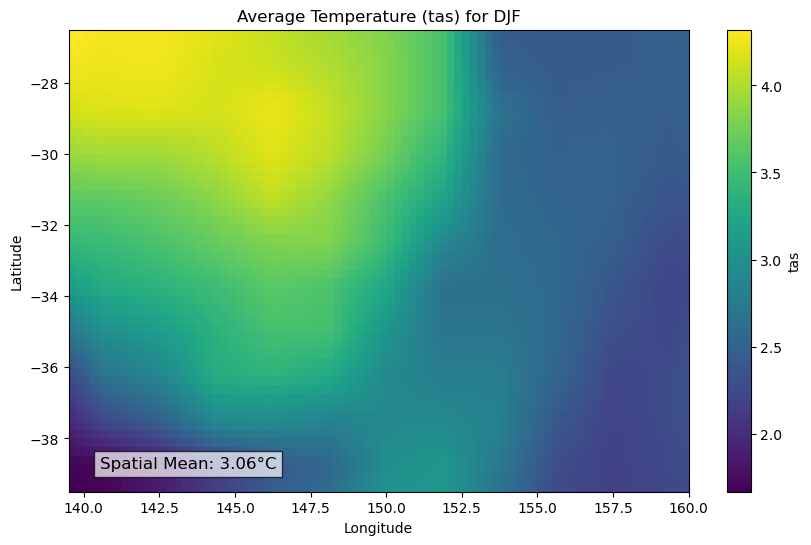

In [14]:
import xarray as xr
import matplotlib.pyplot as plt

# Select DJF months (December = 12, January = 1, February = 2)
tas_djf = dataset1.tas.sel(month=[12, 1, 2])

# Calculate the average over the selected months
tas_djf_mean = tas_djf.mean(dim='month')

# Calculate the spatial mean
spatial_mean = tas_djf_mean.mean(dim=['lat', 'lon']).values

# Plotting the averaged tas data
plt.figure(figsize=(10, 6))
tas_plot = tas_djf_mean.plot(cmap='viridis')  # xarray handles colorbar

# Annotate the spatial mean
plt.annotate(
    f'Spatial Mean: {spatial_mean:.2f}°C',  # Format to 2 decimal places
    xy=(0.05, 0.05),  # Position in figure coordinates (x, y)
    xycoords='axes fraction',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.7)
)

plt.title('Average Temperature (tas) for DJF')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



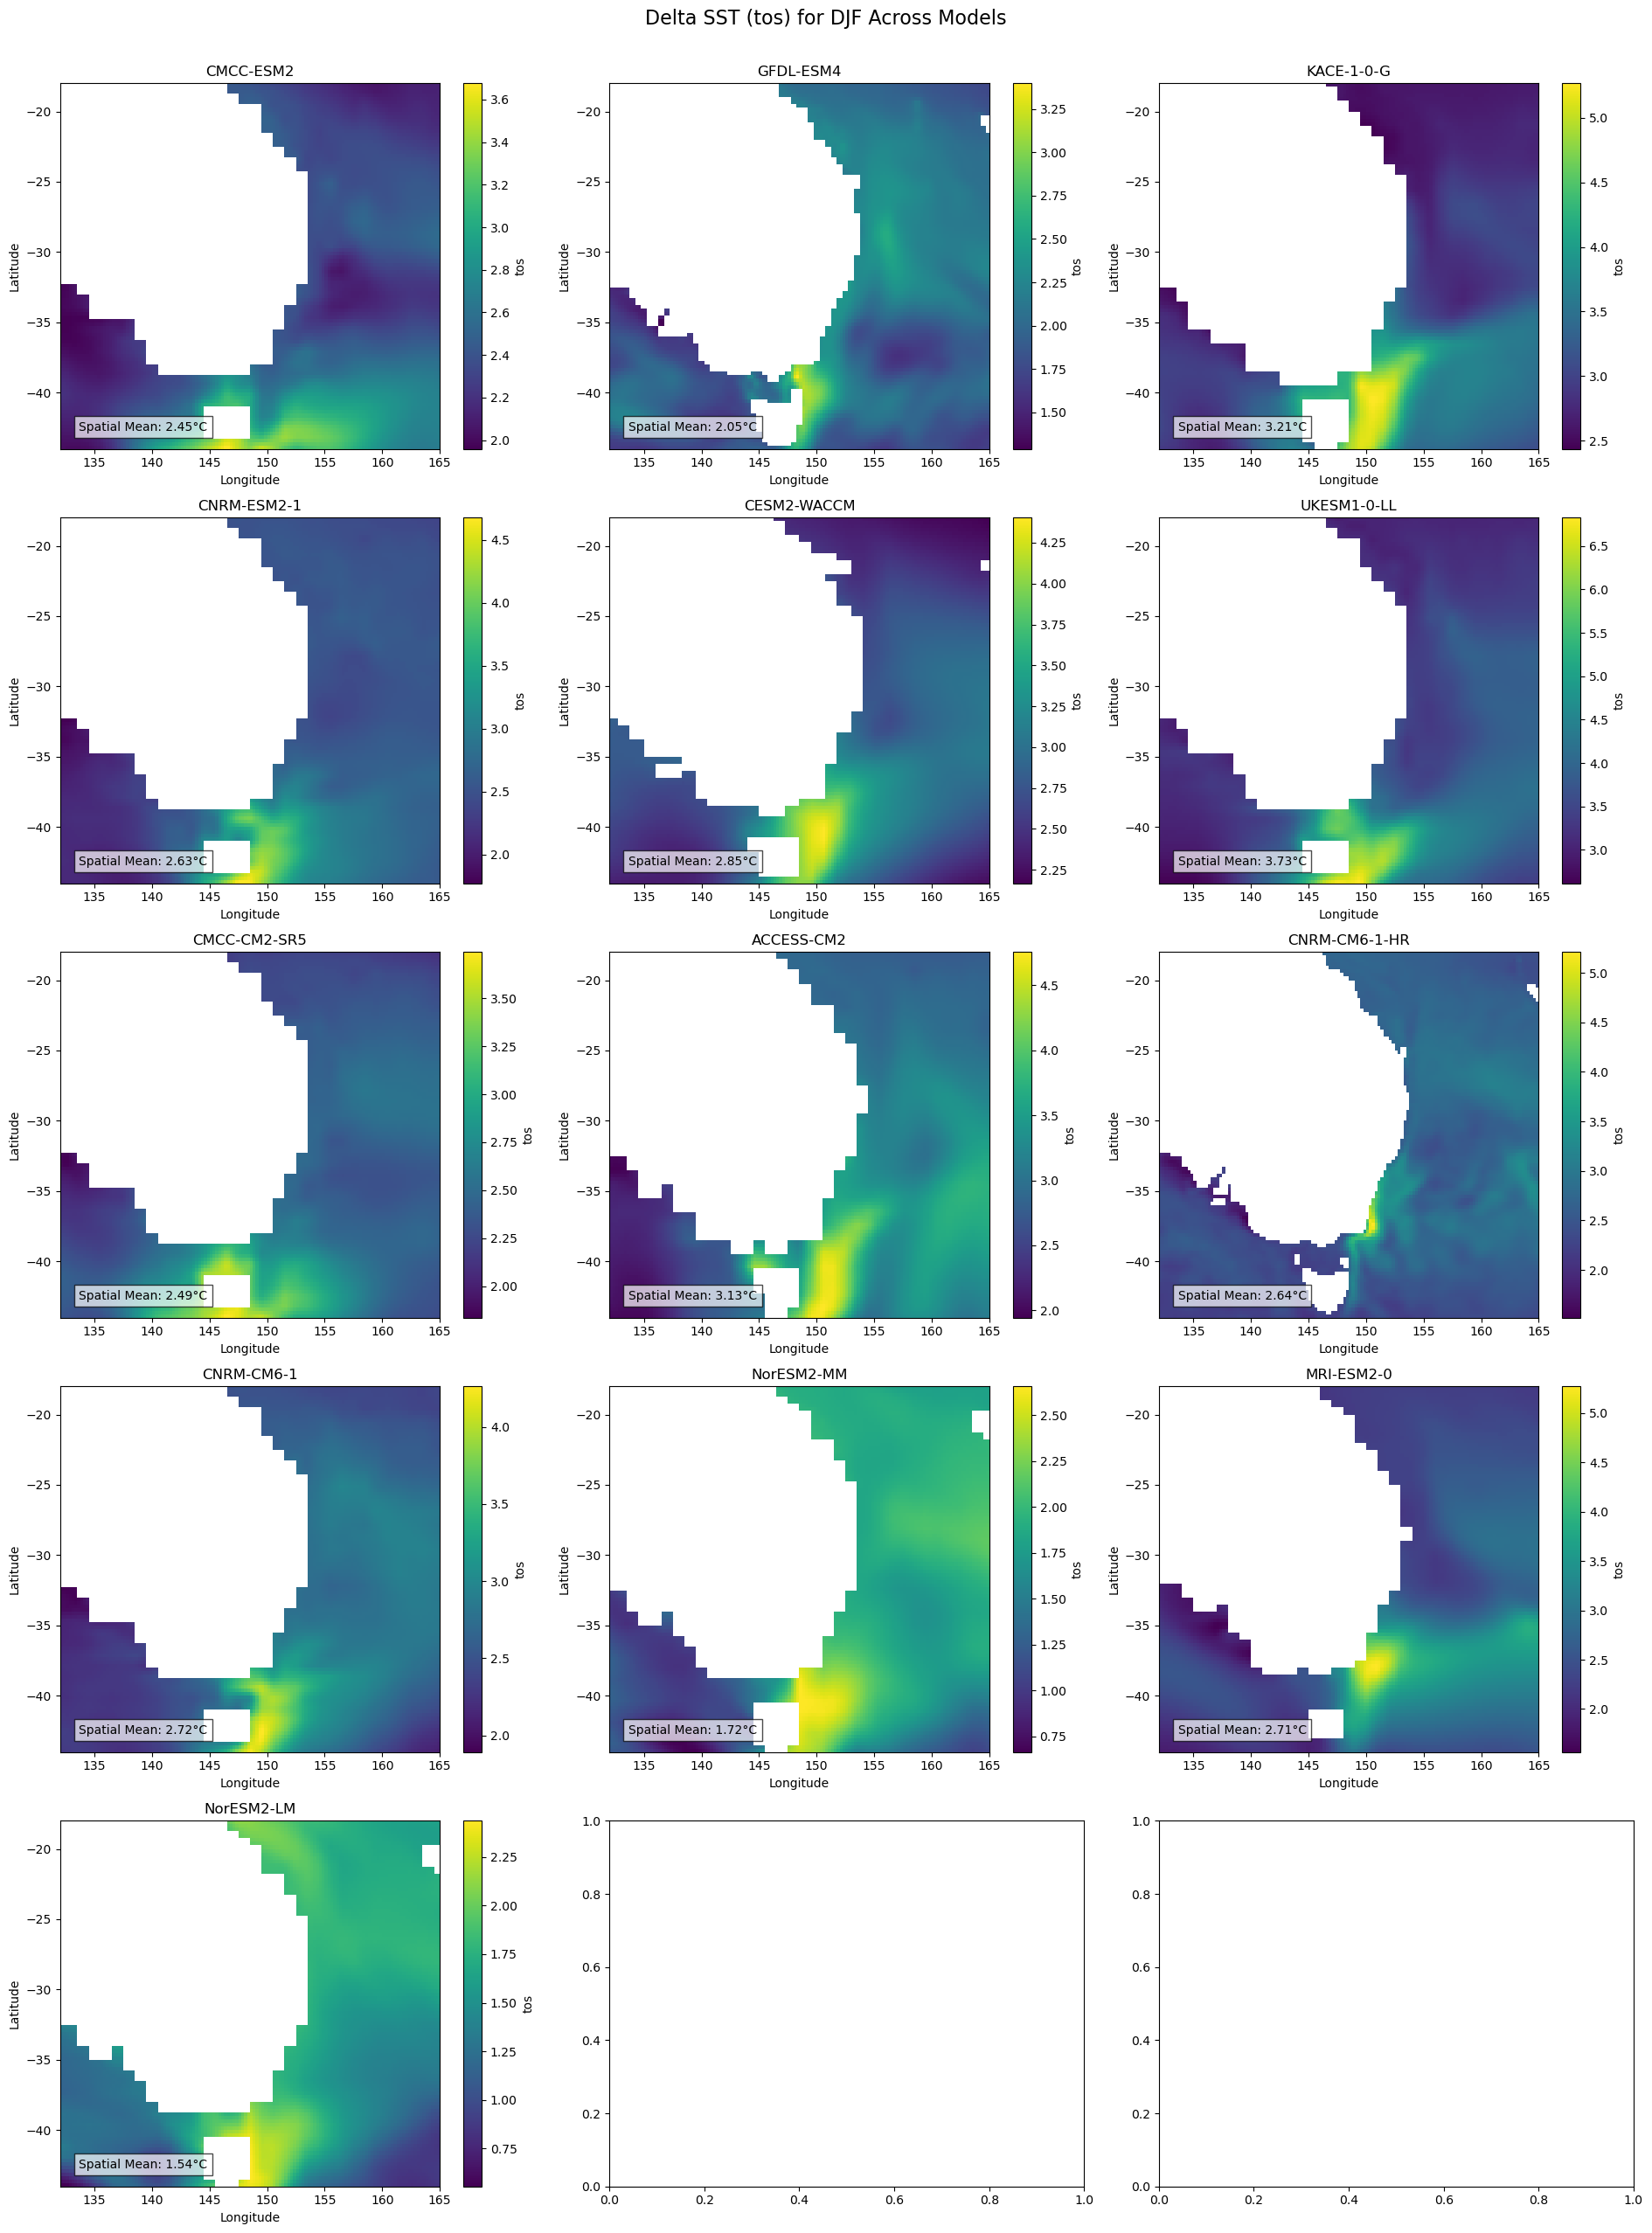

In [10]:
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
import os

# Path to the folder containing the NetCDF files
data_path = '/g/data/up6/gs5098/Project-2/delta/deltas_model/monthly_mean/tos/'

# List all files matching the pattern <modelname>_tas.nc
file_list = glob(os.path.join(data_path, '*_tos.nc'))

# Set up subplots
n_files = len(file_list)
n_cols = 3  # Number of columns for subplots
n_rows = -(-n_files // n_cols)  # Calculate rows, ensuring enough for all files

fig, axes = plt.subplots(n_rows, n_cols, figsize=(19, 5 * n_rows))
axes = axes.flatten()  # Flatten axes for easy iteration

# Loop over each file and create a subplot
for i, file in enumerate(file_list):
    # Extract model name from filename
    model_name = os.path.basename(file).split('_')[0]
    
    # Open the dataset
    dataset = xr.open_dataset(file)
    
    # Select DJF months (December = 12, January = 1, February = 2)
    tas_djf = dataset.tos.sel(month=[12, 1, 2])
    
    # Calculate the average over DJF months
    tas_djf_mean = tas_djf.mean(dim='month')
    
    # Calculate the spatial mean
    spatial_mean = tas_djf_mean.mean(dim=['lat', 'lon']).values
    
    # Plot the data
    tas_djf_mean.plot(ax=axes[i], cmap='viridis')
    
    # Annotate the spatial mean
    axes[i].annotate(
        f'Spatial Mean: {spatial_mean:.2f}°C',
        xy=(0.05, 0.05),
        xycoords='axes fraction',
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.7)
    )
    
    # Set title as model name
    axes[i].set_title(model_name)
    axes[i].set_xlabel('Longitude')
    axes[i].set_ylabel('Latitude')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('Delta SST (tos) for DJF Across Models', fontsize=16, y=1.02)
plt.show()
